## Data Preprocessing

In [19]:
#load pacakages
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 


In [20]:
#load dataset 
df = pd.read_csv('Health_Insurance_Clean.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14.0,3,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,6.0,3,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14.0,3,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0


In [21]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,6.009178,2.662415,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,3.492756,0.841994,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,4.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,6.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,6.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,14.000000,4.000000,22.000000,43350.400000,1.000000


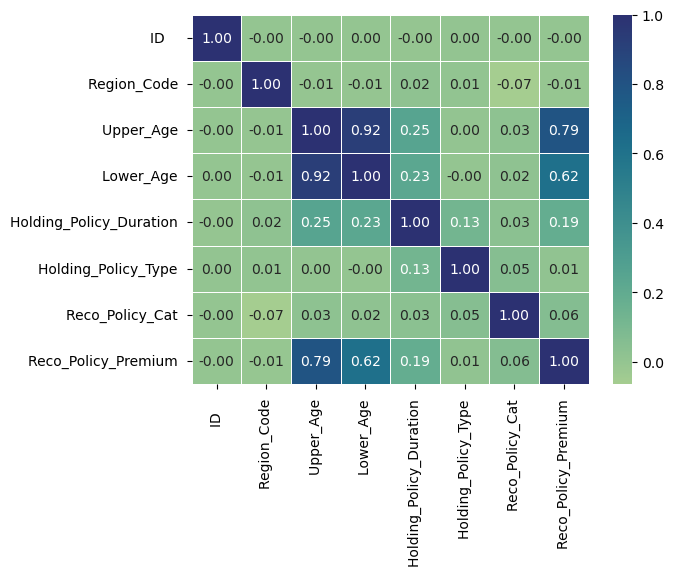

In [22]:
correlation = df.drop(['Response'],axis=1).corr()
correlation_heatmap = sns.heatmap(correlation,annot=True,fmt = '.2f',linewidth = 0.5,cmap='crest')

In [23]:
#check column name
df.columns

Index(['ID    ', 'City_Code ', 'Region_Code ', 'Accomodation_Type ',
       'Reco_Insurance_Type ', 'Upper_Age ', 'Lower_Age ', 'Is_Spouse ',
       'Health Indicator ', 'Holding_Policy_Duration ', 'Holding_Policy_Type ',
       'Reco_Policy_Cat ', 'Reco_Policy_Premium ', 'Response'],
      dtype='object')

In [24]:
#remove space in columns name
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [25]:
# Grouping X6,X7,X8,X9 into a single group due to low value count
df['Health Indicator'].replace(('X1','X2','X3','X4','X5','X6','X7','X8','X9'), (0,1,2,3,4,4,4,4,4), inplace = True)
# Grouping 10 areas into 1 area
df['City_Code'].replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                           'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                           'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                           'C31','C32','C33','C34','C35','C36'), (0,0,0,0,0,0,0,0,0,0,
                                                            1,1,1,1,1,1,1,1,1,1,
                                                            2,2,2,2,2,2,2,2,2,2,
                                                            3,3,3,3,3,3), inplace = True)

df['Is_Spouse'].replace(('Yes','No'), (1,0), inplace = True)
df['Reco_Insurance_Type'].replace(('Individual', 'Joint'), (1,0), inplace = True)
df['Accomodation_Type'].replace(('Owned','Rented'), (1,0), inplace = True)

In [26]:
df = df.drop(['ID','Lower_Age'],axis=1)
df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,0,3213,0,1,36,0,0,14.0,3,22,11628.0,0
1,0,1117,1,0,75,0,1,6.0,3,22,30510.0,0
2,0,3732,1,1,32,0,0,1.0,1,19,7450.0,1
3,2,4378,1,0,52,0,0,14.0,3,19,17780.0,0
4,0,2190,0,1,44,0,1,3.0,1,16,10404.0,0


### Machine Learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
X = df.drop(['Response'],axis=1)
y= df['Response']

In [30]:
y.value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [31]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
#oversampling
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [33]:
y_resampled.value_counts()

0    38673
1    38673
Name: Response, dtype: int64

In [34]:
#Split the data
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [35]:
#Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg.predict(X_test)
logreg.score(X_test,y_test)

0.5426219617307361

In [36]:
#Tuning Logistic Regresstion Model
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
#Apply GridSearchCV
clf = GridSearchCV(logreg,
                   param_grid=parameters,
                   scoring='accuracy',
                   cv=10)

clf.fit(X_train,y_train)

In [ ]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)